In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, LSTM, Dropout, Dense,GRU
# 导入处理后的数据文件
file_path = 'data/huojiaqi_model.csv'
data = pd.read_csv(file_path)

# 去除'id'和'day'列，假设最后一列'huojiaqi'是目标变量
X = data.drop(columns=['id', 'day', 'huojiaqi'])
y = data['huojiaqi']

# 划分数据集为训练集、临时集（后续分为验证集和测试集）
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train_expanded = np.expand_dims(X_train, axis=-1)
X_val_expanded = np.expand_dims(X_val, axis=-1)


In [5]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Bidirectional, LSTM, MultiHeadAttention, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
print("Input shape:", inputs.shape)  # 输出输入层的维度
inputs = Input(shape=input_shape)

# 卷积层
x = Conv1D(filters=16, kernel_size=3, strides=1, padding='valid')(inputs)
print("After Conv1D:", x.shape)  # 输出卷积层后的维度
x = MaxPooling1D(pool_size=2)(x)
print("After MaxPooling1D:", x.shape)  # 输出池化层后的维度
x = BatchNormalization()(x)
print("After BatchNormalization:", x.shape)  # 输出批量归一化后的维度

# 双向LSTM层
x = Bidirectional(LSTM(32, return_sequences=True))(x)
print("After Bidirectional LSTM:", x.shape)  # 输出双向LSTM后的维度

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=5, key_dim=64)(x, x)
print("After MultiHeadAttention:", attention_output.shape)  # 输出多头注意力机制后的维度

# 将注意力输出展平
x = Flatten()(attention_output)
print("After Flatten:", x.shape)  # 输出展平后的维度

# Dropout层
x = Dropout(0.3)(x)
print("After Dropout:", x.shape)  # 输出Dropout后的维度

# 全连接层
outputs = Dense(1)(x)
print("After Dense:", outputs.shape)  # 输出全连接层后的维度

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.00427), loss='mse', metrics=['mse'])

# 添加ModelCheckpoint回调函数
checkpoint = ModelCheckpoint('model/P.model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1, callbacks=[checkpoint])

# 载入保存的最佳模型
model.load_weights('model/P.model.h5')

# 预测验证集P
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)


Input shape: (None, 14, 1)
After Conv1D: (None, 12, 16)
After MaxPooling1D: (None, 6, 16)
After BatchNormalization: (None, 6, 16)
After Bidirectional LSTM: (None, 6, 64)
After MultiHeadAttention: (None, 6, 64)
After Flatten: (None, 384)
After Dropout: (None, 384)
After Dense: (None, 1)
Epoch 1/300
1/5 [=====>........................] - ETA: 18s - loss: 19.3348 - mse: 19.3348
Epoch 1: val_loss improved from inf to 19.25758, saving model to model\P.model.h5
5/5 [==============================] - 6s 221ms/step - loss: 19.5516 - mse: 19.5516 - val_loss: 19.2576 - val_mse: 19.2576
Epoch 2/300
1/5 [=====>........................] - ETA: 0s - loss: 10.2129 - mse: 10.2129
Epoch 2: val_loss improved from 19.25758 to 12.02454, saving model to model\P.model.h5
5/5 [==============================] - 0s 31ms/step - loss: 5.0668 - mse: 5.0668 - val_loss: 12.0245 - val_mse: 12.0245
Epoch 3/300


D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/5 [=====>........................] - ETA: 0s - loss: 4.4171 - mse: 4.4171
Epoch 3: val_loss improved from 12.02454 to 10.09842, saving model to model\P.model.h5
5/5 [==============================] - 0s 30ms/step - loss: 3.3254 - mse: 3.3254 - val_loss: 10.0984 - val_mse: 10.0984
Epoch 4/300
1/5 [=====>........................] - ETA: 0s - loss: 2.5277 - mse: 2.5277
Epoch 4: val_loss did not improve from 10.09842
5/5 [==============================] - 0s 18ms/step - loss: 1.8168 - mse: 1.8168 - val_loss: 13.9492 - val_mse: 13.9492
Epoch 5/300
1/5 [=====>........................] - ETA: 0s - loss: 1.2890 - mse: 1.2890
Epoch 5: val_loss did not improve from 10.09842
5/5 [==============================] - 0s 18ms/step - loss: 1.2558 - mse: 1.2558 - val_loss: 11.3463 - val_mse: 11.3463
Epoch 6/300
1/5 [=====>........................] - ETA: 0s - loss: 0.9470 - mse: 0.9470
Epoch 6: val_loss did not improve from 10.09842
5/5 [==============================] - 0s 18ms/step - loss: 1.7771 - 

Epoch 34/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2445 - mse: 0.2445
Epoch 34: val_loss did not improve from 5.36115
5/5 [==============================] - 0s 19ms/step - loss: 0.2491 - mse: 0.2491 - val_loss: 5.6493 - val_mse: 5.6493
Epoch 35/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1410 - mse: 0.1410
Epoch 35: val_loss improved from 5.36115 to 5.17506, saving model to model\P.model.h5
5/5 [==============================] - 0s 29ms/step - loss: 0.1972 - mse: 0.1972 - val_loss: 5.1751 - val_mse: 5.1751
Epoch 36/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2996 - mse: 0.2996
Epoch 36: val_loss did not improve from 5.17506
5/5 [==============================] - 0s 17ms/step - loss: 0.3554 - mse: 0.3554 - val_loss: 5.3339 - val_mse: 5.3339
Epoch 37/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1993 - mse: 0.1993
Epoch 37: val_loss improved from 5.17506 to 5.14862, saving model to model\P.model.h5
5/5 [=================

Epoch 65/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1132 - mse: 0.1132
Epoch 65: val_loss improved from 2.69836 to 2.61807, saving model to model\P.model.h5
5/5 [==============================] - 0s 28ms/step - loss: 0.1840 - mse: 0.1840 - val_loss: 2.6181 - val_mse: 2.6181
Epoch 66/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1598 - mse: 0.1598
Epoch 66: val_loss did not improve from 2.61807
5/5 [==============================] - 0s 17ms/step - loss: 0.1834 - mse: 0.1834 - val_loss: 3.2289 - val_mse: 3.2289
Epoch 67/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1808 - mse: 0.1808
Epoch 67: val_loss improved from 2.61807 to 2.20981, saving model to model\P.model.h5
5/5 [==============================] - 0s 29ms/step - loss: 0.2297 - mse: 0.2297 - val_loss: 2.2098 - val_mse: 2.2098
Epoch 68/300
1/5 [=====>........................] - ETA: 0s - loss: 0.3944 - mse: 0.3944
Epoch 68: val_loss did not improve from 2.20981
5/5 [=================

1/5 [=====>........................] - ETA: 0s - loss: 0.1432 - mse: 0.1432
Epoch 126: val_loss did not improve from 0.09359
5/5 [==============================] - 0s 21ms/step - loss: 0.1341 - mse: 0.1341 - val_loss: 0.2113 - val_mse: 0.2113
Epoch 127/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1451 - mse: 0.1451
Epoch 127: val_loss did not improve from 0.09359
5/5 [==============================] - 0s 20ms/step - loss: 0.1097 - mse: 0.1097 - val_loss: 0.1011 - val_mse: 0.1011
Epoch 128/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1655 - mse: 0.1655
Epoch 128: val_loss improved from 0.09359 to 0.05542, saving model to model\P.model.h5
5/5 [==============================] - 0s 33ms/step - loss: 0.1193 - mse: 0.1193 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 129/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1171 - mse: 0.1171
Epoch 129: val_loss did not improve from 0.05542
5/5 [==============================] - 0s 21ms/step - loss: 0.1258

Epoch 158/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1153 - mse: 0.1153
Epoch 158: val_loss did not improve from 0.05542
5/5 [==============================] - 0s 22ms/step - loss: 0.1430 - mse: 0.1430 - val_loss: 0.1119 - val_mse: 0.1119
Epoch 159/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0839 - mse: 0.0839
Epoch 159: val_loss did not improve from 0.05542
5/5 [==============================] - 0s 22ms/step - loss: 0.1721 - mse: 0.1721 - val_loss: 0.2534 - val_mse: 0.2534
Epoch 160/300
1/5 [=====>........................] - ETA: 0s - loss: 0.4073 - mse: 0.4073
Epoch 160: val_loss did not improve from 0.05542
5/5 [==============================] - 0s 21ms/step - loss: 0.2844 - mse: 0.2844 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 161/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1242 - mse: 0.1242
Epoch 161: val_loss did not improve from 0.05542
5/5 [==============================] - 0s 21ms/step - loss: 0.1246 - mse: 0.1246 - val_los

Epoch 190/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1036 - mse: 0.1036
Epoch 190: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 191/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0432 - mse: 0.0432
Epoch 191: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0782 - mse: 0.0782 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 192/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0793 - mse: 0.0793
Epoch 192: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.1350 - mse: 0.1350 - val_loss: 0.1398 - val_mse: 0.1398
Epoch 193/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1635 - mse: 0.1635
Epoch 193: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 20ms/step - loss: 0.1139 - mse: 0.1139 - val_los

Epoch 222/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0561 - mse: 0.0561
Epoch 222: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 22ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 223/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0925 - mse: 0.0925
Epoch 223: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 224/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0526 - mse: 0.0526
Epoch 224: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 225/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0650 - mse: 0.0650
Epoch 225: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0767 - mse: 0.0767 - val_los

Epoch 254/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0707 - mse: 0.0707
Epoch 254: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 255/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0764 - mse: 0.0764
Epoch 255: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 256/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0658 - mse: 0.0658
Epoch 256: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0750 - mse: 0.0750 - val_loss: 0.0647 - val_mse: 0.0647
Epoch 257/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0568 - mse: 0.0568
Epoch 257: val_loss did not improve from 0.04280
5/5 [==============================] - 0s 21ms/step - loss: 0.0970 - mse: 0.0970 - val_los

Epoch 286/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0671 - mse: 0.0671
Epoch 286: val_loss did not improve from 0.03441
5/5 [==============================] - 0s 20ms/step - loss: 0.0795 - mse: 0.0795 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 287/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0878 - mse: 0.0878
Epoch 287: val_loss did not improve from 0.03441
5/5 [==============================] - 0s 20ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 288/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0784 - mse: 0.0784
Epoch 288: val_loss did not improve from 0.03441
5/5 [==============================] - 0s 23ms/step - loss: 0.0963 - mse: 0.0963 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 289/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0599 - mse: 0.0599
Epoch 289: val_loss did not improve from 0.03441
5/5 [==============================] - 0s 20ms/step - loss: 0.1376 - mse: 0.1376 - val_los

MSE: 0.03440969109335498
RMSE: 0.1854984935069689
R^2 Score: 0.9954924445526263


## bilstm

In [2]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 初始化序列模型
model = Sequential()

# 添加一个双向LSTM层
model.add(Bidirectional(LSTM(32, input_shape=(X_train_expanded.shape[1], 1))))

# 添加一个Dropout层，概率为0.3
model.add(Dropout(0.3))

# 添加一个全连接输出层
model.add(Dense(1))

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)



Epoch 1/300
5/5 [==============================] - 6s 200ms/step - loss: 29.0947 - mse: 29.0947 - val_loss: 20.8134 - val_mse: 20.8134
Epoch 2/300
5/5 [==============================] - 0s 14ms/step - loss: 27.5576 - mse: 27.5576 - val_loss: 19.5349 - val_mse: 19.5349
Epoch 3/300
5/5 [==============================] - 0s 14ms/step - loss: 25.8331 - mse: 25.8331 - val_loss: 18.1029 - val_mse: 18.1029
Epoch 4/300
5/5 [==============================] - 0s 13ms/step - loss: 24.0200 - mse: 24.0200 - val_loss: 16.3419 - val_mse: 16.3419
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 21.6204 - mse: 21.6204 - val_loss: 14.0569 - val_mse: 14.0569
Epoch 6/300
5/5 [==============================] - 0s 13ms/step - loss: 17.9978 - mse: 17.9978 - val_loss: 11.2518 - val_mse: 11.2518
Epoch 7/300
5/5 [==============================] - 0s 14ms/step - loss: 14.3327 - mse: 14.3327 - val_loss: 9.0373 - val_mse: 9.0373
Epoch 8/300
5/5 [==============================] - 0s 13ms/step

5/5 [==============================] - 0s 15ms/step - loss: 1.2440 - mse: 1.2440 - val_loss: 0.6407 - val_mse: 0.6407
Epoch 126/300
5/5 [==============================] - 0s 14ms/step - loss: 1.4252 - mse: 1.4252 - val_loss: 1.1827 - val_mse: 1.1827
Epoch 127/300
5/5 [==============================] - 0s 15ms/step - loss: 1.1439 - mse: 1.1439 - val_loss: 0.6532 - val_mse: 0.6532
Epoch 128/300
5/5 [==============================] - 0s 15ms/step - loss: 1.2734 - mse: 1.2734 - val_loss: 0.6204 - val_mse: 0.6204
Epoch 129/300
5/5 [==============================] - 0s 15ms/step - loss: 1.3170 - mse: 1.3170 - val_loss: 1.1029 - val_mse: 1.1029
Epoch 130/300
5/5 [==============================] - 0s 18ms/step - loss: 1.2150 - mse: 1.2150 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 131/300
5/5 [==============================] - 0s 14ms/step - loss: 1.3259 - mse: 1.3259 - val_loss: 0.5895 - val_mse: 0.5895
Epoch 132/300
5/5 [==============================] - 0s 14ms/step - loss: 1.3814 - mse: 1.

5/5 [==============================] - 0s 15ms/step - loss: 0.9488 - mse: 0.9488 - val_loss: 0.4593 - val_mse: 0.4593
Epoch 250/300
5/5 [==============================] - 0s 15ms/step - loss: 0.9571 - mse: 0.9571 - val_loss: 0.7176 - val_mse: 0.7176
Epoch 251/300
5/5 [==============================] - 0s 15ms/step - loss: 1.0966 - mse: 1.0966 - val_loss: 0.4730 - val_mse: 0.4730
Epoch 252/300
5/5 [==============================] - 0s 15ms/step - loss: 0.9997 - mse: 0.9997 - val_loss: 0.4830 - val_mse: 0.4830
Epoch 253/300
5/5 [==============================] - 0s 15ms/step - loss: 0.9985 - mse: 0.9985 - val_loss: 0.5283 - val_mse: 0.5283
Epoch 254/300
5/5 [==============================] - 0s 15ms/step - loss: 1.1125 - mse: 1.1125 - val_loss: 0.4883 - val_mse: 0.4883
Epoch 255/300
5/5 [==============================] - 0s 15ms/step - loss: 1.0755 - mse: 1.0755 - val_loss: 0.9173 - val_mse: 0.9173
Epoch 256/300
5/5 [==============================] - 0s 15ms/step - loss: 1.2955 - mse: 1.

MSE: 0.41428981245571245
RMSE: 0.6436534878766
R^2 Score: 0.9457294081524962


In [4]:
model.save("model/BiLSTM_model.h5")
print("模型已保存为BiLSTM_model.h5")
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载保存的最佳模型
model = load_model('model/BiLSTM_model.h5')

# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数a
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


模型已保存为BiLSTM_model.h5
2/2 [==============================] - 1s 4ms/step
Test Loss: 0.6867828965187073
Test MSE: 0.6867828965187073
R^2 Score on Test Set: 0.9153921707226177


## Cnn_BiLSTM_model

Epoch 1/300
5/5 [==============================] - 4s 186ms/step - loss: 29.4807 - mse: 29.4807 - val_loss: 20.5600 - val_mse: 20.5600
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 26.9682 - mse: 26.9682 - val_loss: 18.6855 - val_mse: 18.6855
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 24.5402 - mse: 24.5402 - val_loss: 16.7376 - val_mse: 16.7376
Epoch 4/300
5/5 [==============================] - 0s 13ms/step - loss: 22.1698 - mse: 22.1698 - val_loss: 14.6293 - val_mse: 14.6293
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 19.4678 - mse: 19.4678 - val_loss: 12.4359 - val_mse: 12.4359
Epoch 6/300
5/5 [==============================] - 0s 14ms/step - loss: 16.1522 - mse: 16.1522 - val_loss: 10.5641 - val_mse: 10.5641
Epoch 7/300
5/5 [==============================] - 0s 13ms/step - loss: 13.7101 - mse: 13.7101 - val_loss: 9.6895 - val_mse: 9.6895
Epoch 8/300
5/5 [==============================] - 0s 12ms/step

5/5 [==============================] - 0s 13ms/step - loss: 0.8153 - mse: 0.8153 - val_loss: 0.6910 - val_mse: 0.6910
Epoch 126/300
5/5 [==============================] - 0s 12ms/step - loss: 1.0348 - mse: 1.0348 - val_loss: 0.4455 - val_mse: 0.4455
Epoch 127/300
5/5 [==============================] - 0s 13ms/step - loss: 0.8373 - mse: 0.8373 - val_loss: 0.3833 - val_mse: 0.3833
Epoch 128/300
5/5 [==============================] - 0s 13ms/step - loss: 0.7518 - mse: 0.7518 - val_loss: 0.4839 - val_mse: 0.4839
Epoch 129/300
5/5 [==============================] - 0s 13ms/step - loss: 0.8001 - mse: 0.8001 - val_loss: 0.4207 - val_mse: 0.4207
Epoch 130/300
5/5 [==============================] - 0s 13ms/step - loss: 0.8328 - mse: 0.8328 - val_loss: 0.3791 - val_mse: 0.3791
Epoch 131/300
5/5 [==============================] - 0s 13ms/step - loss: 0.7444 - mse: 0.7444 - val_loss: 0.4153 - val_mse: 0.4153
Epoch 132/300
5/5 [==============================] - 0s 13ms/step - loss: 0.6929 - mse: 0.

5/5 [==============================] - 0s 14ms/step - loss: 0.3955 - mse: 0.3955 - val_loss: 0.2660 - val_mse: 0.2660
Epoch 250/300
5/5 [==============================] - 0s 14ms/step - loss: 0.4357 - mse: 0.4357 - val_loss: 0.2086 - val_mse: 0.2086
Epoch 251/300
5/5 [==============================] - 0s 14ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.2032 - val_mse: 0.2032
Epoch 252/300
5/5 [==============================] - 0s 13ms/step - loss: 0.4667 - mse: 0.4667 - val_loss: 0.3647 - val_mse: 0.3647
Epoch 253/300
5/5 [==============================] - 0s 14ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.2700 - val_mse: 0.2700
Epoch 254/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3833 - mse: 0.3833 - val_loss: 0.2048 - val_mse: 0.2048
Epoch 255/300
5/5 [==============================] - 0s 13ms/step - loss: 0.4206 - mse: 0.4206 - val_loss: 0.2200 - val_mse: 0.2200
Epoch 256/300
5/5 [==============================] - 0s 13ms/step - loss: 0.5160 - mse: 0.

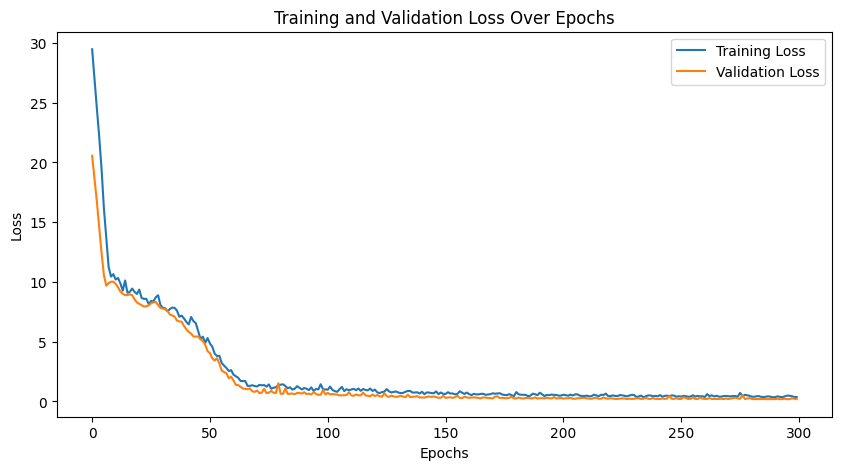

MSE: 0.19210513777674273
RMSE: 0.4382980011096819
R^2 Score: 0.9748348638787622


D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


模型已保存为Cnn_BiLSTM_model.h5


In [13]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Conv1D, MaxPooling1D, BatchNormalization

# 构建模型
# 构建模型
model = Sequential()

# 添加卷积层
model.add(Conv1D(filters=16, kernel_size=3, strides=1, padding='valid', input_shape=(X_train_expanded.shape[1], 1)))
# 添加池化层
model.add(MaxPooling1D(pool_size=2))
# 双向LSTM层
model.add(Bidirectional(LSTM(32)))
# 添加Dropout层
model.add(Dropout(0.3))
# 全连接层
model.add(Dense(1))

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)
# 保存模型
model.save("model/Cnn_BiLSTM_model.h5")
print("模型已保存为Cnn_BiLSTM_model.h5")

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载保存的最佳模型
model = load_model('model/Cnn_BiLSTM_model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


2/2 [==============================] - 1s 4ms/step
Test Loss: 0.17713850736618042
Test MSE: 0.17713850736618042
R^2 Score on Test Set: 0.9781775293386945


##  Cnn_BiLSTM_MultAE

Epoch 1/300
5/5 [==============================] - 5s 208ms/step - loss: 28.4777 - mse: 28.4777 - val_loss: 22.2617 - val_mse: 22.2617
Epoch 2/300
5/5 [==============================] - 0s 20ms/step - loss: 20.7138 - mse: 20.7138 - val_loss: 22.0922 - val_mse: 22.0922
Epoch 3/300
5/5 [==============================] - 0s 17ms/step - loss: 7.0153 - mse: 7.0153 - val_loss: 18.7377 - val_mse: 18.7377
Epoch 4/300
5/5 [==============================] - 0s 18ms/step - loss: 4.8051 - mse: 4.8051 - val_loss: 12.1663 - val_mse: 12.1663
Epoch 5/300
5/5 [==============================] - 0s 18ms/step - loss: 1.6050 - mse: 1.6050 - val_loss: 11.6288 - val_mse: 11.6288
Epoch 6/300
5/5 [==============================] - 0s 18ms/step - loss: 1.7743 - mse: 1.7743 - val_loss: 12.5155 - val_mse: 12.5155
Epoch 7/300
5/5 [==============================] - 0s 17ms/step - loss: 1.1957 - mse: 1.1957 - val_loss: 13.1846 - val_mse: 13.1846
Epoch 8/300
5/5 [==============================] - 0s 18ms/step - loss:

5/5 [==============================] - 0s 18ms/step - loss: 0.1100 - mse: 0.1100 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 126/300
5/5 [==============================] - 0s 19ms/step - loss: 0.1307 - mse: 0.1307 - val_loss: 0.2184 - val_mse: 0.2184
Epoch 127/300
5/5 [==============================] - 0s 18ms/step - loss: 0.2165 - mse: 0.2165 - val_loss: 0.1799 - val_mse: 0.1799
Epoch 128/300
5/5 [==============================] - 0s 18ms/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 129/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1124 - mse: 0.1124 - val_loss: 0.1022 - val_mse: 0.1022
Epoch 130/300
5/5 [==============================] - 0s 19ms/step - loss: 0.1579 - mse: 0.1579 - val_loss: 0.1514 - val_mse: 0.1514
Epoch 131/300
5/5 [==============================] - 0s 19ms/step - loss: 0.1171 - mse: 0.1171 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 132/300
5/5 [==============================] - 0s 18ms/step - loss: 0.1891 - mse: 0.

5/5 [==============================] - 0s 22ms/step - loss: 0.0783 - mse: 0.0783 - val_loss: 0.0767 - val_mse: 0.0767
Epoch 250/300
5/5 [==============================] - 0s 24ms/step - loss: 0.1036 - mse: 0.1036 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 251/300
5/5 [==============================] - 0s 23ms/step - loss: 0.1356 - mse: 0.1356 - val_loss: 0.1030 - val_mse: 0.1030
Epoch 252/300
5/5 [==============================] - 0s 23ms/step - loss: 0.1079 - mse: 0.1079 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 253/300
5/5 [==============================] - 0s 21ms/step - loss: 0.1068 - mse: 0.1068 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 254/300
5/5 [==============================] - 0s 22ms/step - loss: 0.1402 - mse: 0.1402 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 255/300
5/5 [==============================] - 0s 22ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.1263 - val_mse: 0.1263
Epoch 256/300
5/5 [==============================] - 0s 22ms/step - loss: 0.1610 - mse: 0.

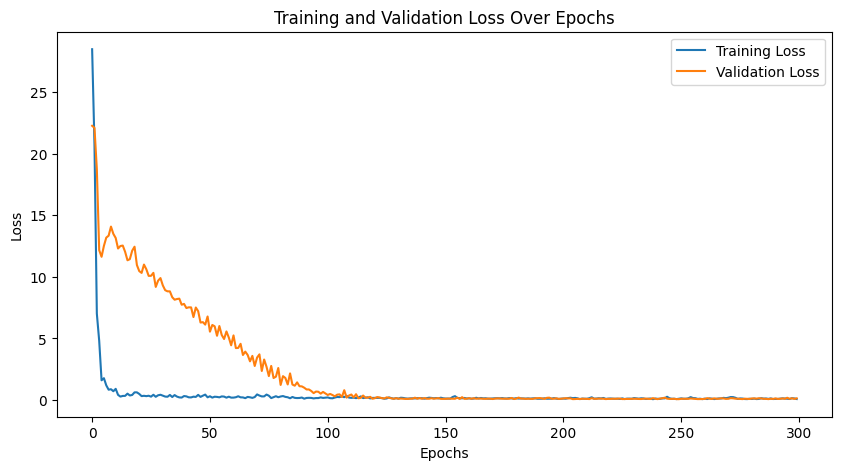

MSE: 0.14052197323503818
RMSE: 0.37486260581049985
R^2 Score: 0.9815920874089563


In [43]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense,BatchNormalization,Flatten
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
inputs = Input(shape=input_shape)

# 卷积层
x = Conv1D(filters=16, kernel_size=3, strides=1, padding='valid')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = BatchNormalization()(x) 
# 双向LSTM层
x = Bidirectional(LSTM(32, return_sequences=True))(x)

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(x, x)  # 注意力机制输入和输出应相同

# 将注意力输出展平
x = Flatten()(attention_output)

# Dropout层
x = Dropout(0.3)(x)

# 全连接层
outputs = Dense(1)(x)

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)


# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)


In [47]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
# 保存模型
# model.save("model/Cnn_BiLSTM_MultAE.model.h5")
# print("模型已保存为Cnn_BiLSTM_MultAE.h5")
# 加载保存的最佳模型
model = load_model('model/Cnn_BiLSTM_MultAE.model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


2/2 [==============================] - 1s 4ms/step
Test Loss: 0.15549258887767792
Test MSE: 0.15549258887767792
R^2 Score on Test Set: 0.9808441862124976


## Pso_Cnn_BiLSTM_MultAE

Epoch 1/300
1/5 [=====>........................] - ETA: 18s - loss: 35.7971 - mse: 35.7971
Epoch 1: val_loss improved from inf to 23.41062, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5


D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 6s 338ms/step - loss: 21.1933 - mse: 21.1933 - val_loss: 23.4106 - val_mse: 23.4106
Epoch 2/300
1/5 [=====>........................] - ETA: 0s - loss: 7.7548 - mse: 7.7548
Epoch 2: val_loss improved from 23.41062 to 9.87769, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5
5/5 [==============================] - 0s 108ms/step - loss: 4.2595 - mse: 4.2595 - val_loss: 9.8777 - val_mse: 9.8777
Epoch 3/300
1/5 [=====>........................] - ETA: 0s - loss: 3.0261 - mse: 3.0261
Epoch 3: val_loss did not improve from 9.87769
5/5 [==============================] - 0s 19ms/step - loss: 2.7001 - mse: 2.7001 - val_loss: 10.0452 - val_mse: 10.0452
Epoch 4/300
5/5 [==============================] - ETA: 0s - loss: 1.2417 - mse: 1.2417
Epoch 4: val_loss did not improve from 9.87769
5/5 [==============================] - 0s 23ms/step - loss: 1.2417 - mse: 1.2417 - val_loss: 12.3180 - val_mse: 12.3180
Epoch 5/300
1/5 [=====>........................] - ETA

5/5 [==============================] - 0s 85ms/step - loss: 0.2583 - mse: 0.2583 - val_loss: 5.9334 - val_mse: 5.9334
Epoch 32/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2153 - mse: 0.2153
Epoch 32: val_loss did not improve from 5.93343
5/5 [==============================] - 0s 20ms/step - loss: 0.3196 - mse: 0.3196 - val_loss: 6.1171 - val_mse: 6.1171
Epoch 33/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2965 - mse: 0.2965
Epoch 33: val_loss improved from 5.93343 to 5.56482, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5
5/5 [==============================] - 0s 83ms/step - loss: 0.2943 - mse: 0.2943 - val_loss: 5.5648 - val_mse: 5.5648
Epoch 34/300
1/5 [=====>........................] - ETA: 0s - loss: 0.3373 - mse: 0.3373
Epoch 34: val_loss improved from 5.56482 to 5.48322, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5
5/5 [==============================] - 0s 117ms/step - loss: 0.2189 - mse: 0.2189 - val_loss: 5.4832 - val_mse: 5.4832


5/5 [==============================] - 0s 20ms/step - loss: 0.2100 - mse: 0.2100 - val_loss: 3.3668 - val_mse: 3.3668
Epoch 60/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1685 - mse: 0.1685
Epoch 60: val_loss improved from 3.15340 to 2.91305, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5
5/5 [==============================] - 0s 72ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 2.9130 - val_mse: 2.9130
Epoch 61/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2047 - mse: 0.2047
Epoch 61: val_loss did not improve from 2.91305
5/5 [==============================] - 0s 20ms/step - loss: 0.2555 - mse: 0.2555 - val_loss: 3.5299 - val_mse: 3.5299
Epoch 62/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2849 - mse: 0.2849
Epoch 62: val_loss improved from 2.91305 to 2.41862, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5
5/5 [==============================] - 0s 99ms/step - loss: 0.3644 - mse: 0.3644 - val_loss: 2.4186 - val_mse: 2.4186
E

Epoch 89/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1053 - mse: 0.1053
Epoch 89: val_loss improved from 0.89844 to 0.77873, saving model to model\Pso_Cnn_BiLSTM_MultAE.model.h5
5/5 [==============================] - 1s 165ms/step - loss: 0.1645 - mse: 0.1645 - val_loss: 0.7787 - val_mse: 0.7787
Epoch 90/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1563 - mse: 0.1563
Epoch 90: val_loss did not improve from 0.77873
5/5 [==============================] - 0s 20ms/step - loss: 0.1490 - mse: 0.1490 - val_loss: 1.1148 - val_mse: 1.1148
Epoch 91/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2603 - mse: 0.2603
Epoch 91: val_loss did not improve from 0.77873
5/5 [==============================] - 0s 20ms/step - loss: 0.1670 - mse: 0.1670 - val_loss: 0.9109 - val_mse: 0.9109
Epoch 92/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1387 - mse: 0.1387
Epoch 92: val_loss did not improve from 0.77873
5/5 [==============================] - 

5/5 [==============================] - 0s 20ms/step - loss: 0.1820 - mse: 0.1820 - val_loss: 0.6214 - val_mse: 0.6214
Epoch 119/300
1/5 [=====>........................] - ETA: 0s - loss: 0.5509 - mse: 0.5509
Epoch 119: val_loss did not improve from 0.10527
5/5 [==============================] - 0s 19ms/step - loss: 0.3658 - mse: 0.3658 - val_loss: 0.2554 - val_mse: 0.2554
Epoch 120/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2798 - mse: 0.2798
Epoch 120: val_loss did not improve from 0.10527
5/5 [==============================] - 0s 18ms/step - loss: 0.2128 - mse: 0.2128 - val_loss: 0.2531 - val_mse: 0.2531
Epoch 121/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1973 - mse: 0.1973
Epoch 121: val_loss did not improve from 0.10527
5/5 [==============================] - 0s 16ms/step - loss: 0.1869 - mse: 0.1869 - val_loss: 0.1436 - val_mse: 0.1436
Epoch 122/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0807 - mse: 0.0807
Epoch 122: val_loss i

Epoch 182/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0958 - mse: 0.0958
Epoch 182: val_loss did not improve from 0.05745
5/5 [==============================] - 0s 21ms/step - loss: 0.1289 - mse: 0.1289 - val_loss: 0.1004 - val_mse: 0.1004
Epoch 183/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1211 - mse: 0.1211
Epoch 183: val_loss did not improve from 0.05745
5/5 [==============================] - 0s 21ms/step - loss: 0.1644 - mse: 0.1644 - val_loss: 0.1807 - val_mse: 0.1807
Epoch 184/300
1/5 [=====>........................] - ETA: 0s - loss: 0.2313 - mse: 0.2313
Epoch 184: val_loss did not improve from 0.05745
5/5 [==============================] - 0s 22ms/step - loss: 0.1593 - mse: 0.1593 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 185/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0726 - mse: 0.0726
Epoch 185: val_loss did not improve from 0.05745
5/5 [==============================] - 0s 22ms/step - loss: 0.1116 - mse: 0.1116 - val_los

Epoch 214/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0776 - mse: 0.0776
Epoch 214: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 21ms/step - loss: 0.1006 - mse: 0.1006 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 215/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0467 - mse: 0.0467
Epoch 215: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 21ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 216/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0969 - mse: 0.0969
Epoch 216: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 22ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.1561 - val_mse: 0.1561
Epoch 217/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0656 - mse: 0.0656
Epoch 217: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 21ms/step - loss: 0.1682 - mse: 0.1682 - val_los

Epoch 246/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1105 - mse: 0.1105
Epoch 246: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 22ms/step - loss: 0.1341 - mse: 0.1341 - val_loss: 0.0763 - val_mse: 0.0763
Epoch 247/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0739 - mse: 0.0739
Epoch 247: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 21ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.2295 - val_mse: 0.2295
Epoch 248/300
1/5 [=====>........................] - ETA: 0s - loss: 0.1997 - mse: 0.1997
Epoch 248: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 21ms/step - loss: 0.3409 - mse: 0.3409 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 249/300
1/5 [=====>........................] - ETA: 0s - loss: 0.5244 - mse: 0.5244
Epoch 249: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 22ms/step - loss: 0.2696 - mse: 0.2696 - val_los

Epoch 278/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0840 - mse: 0.0840
Epoch 278: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 23ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 279/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0421 - mse: 0.0421
Epoch 279: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 22ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 280/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0918 - mse: 0.0918
Epoch 280: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 22ms/step - loss: 0.1019 - mse: 0.1019 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 281/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0681 - mse: 0.0681
Epoch 281: val_loss did not improve from 0.04216
5/5 [==============================] - 0s 22ms/step - loss: 0.1179 - mse: 0.1179 - val_los

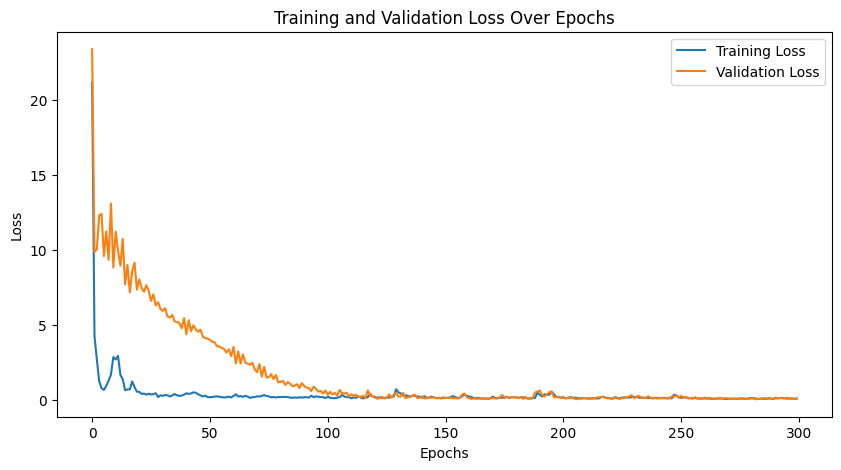

MSE: 0.03576808092681491
RMSE: 0.18912451170277986
R^2 Score: 0.9953144999882053


In [5]:
##[13, 37, 5, 0.004270210484847289]from keras.models import Model
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, BatchNormalization, Flatten
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
inputs = Input(shape=input_shape)

# 卷积层
x = Conv1D(filters=13, kernel_size=3, strides=1, padding='valid')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = BatchNormalization()(x) 
# 双向LSTM层
x = Bidirectional(LSTM(37, return_sequences=True))(x)

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=5, key_dim=74)(x, x)  # 注意力机制输入和输出应相同

# 将注意力输出展平
x = Flatten()(attention_output)

# Dropout层
x = Dropout(0.3)(x)

# 全连接层
outputs = Dense(1)(x)

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.00427), loss='mse', metrics=['mse'])

# 添加ModelCheckpoint回调函数
checkpoint = ModelCheckpoint('model/Pso_Cnn_BiLSTM_MultAE.model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1, callbacks=[checkpoint])

# 载入保存的最佳模型
model.load_weights('model/Pso_Cnn_BiLSTM_MultAE.model.h5')

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)



In [6]:
# 保存模型
# model.save("model/Pso_Cnn_BiLSTM_MultAE.model.h5")
# print("模型已保存为Cnn_BiLSTM_MultAE.h5")
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载保存的最佳模型
model = load_model('model/Pso_Cnn_BiLSTM_MultAE.model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


2/2 [==============================] - 1s 6ms/step
Test Loss: 0.04907497391104698
Test MSE: 0.04907497391104698
R^2 Score on Test Set: 0.9939542372216287


## woa_Cnn_BiLSTM_MultAE

In [ ]:
# [15, 36, 4, 0.003034853355240062]

Epoch 1/300
5/5 [==============================] - 5s 225ms/step - loss: 24.9458 - mse: 24.9458 - val_loss: 24.9475 - val_mse: 24.9475
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 7.7699 - mse: 7.7699 - val_loss: 12.9355 - val_mse: 12.9355
Epoch 3/300
5/5 [==============================] - 0s 20ms/step - loss: 3.1441 - mse: 3.1441 - val_loss: 10.7922 - val_mse: 10.7922
Epoch 4/300
5/5 [==============================] - 0s 17ms/step - loss: 2.0652 - mse: 2.0652 - val_loss: 10.2477 - val_mse: 10.2477
Epoch 5/300
5/5 [==============================] - 0s 16ms/step - loss: 0.9964 - mse: 0.9964 - val_loss: 13.6576 - val_mse: 13.6576
Epoch 6/300
5/5 [==============================] - 0s 19ms/step - loss: 1.5683 - mse: 1.5683 - val_loss: 12.4997 - val_mse: 12.4997
Epoch 7/300
5/5 [==============================] - 0s 16ms/step - loss: 0.8324 - mse: 0.8324 - val_loss: 9.9309 - val_mse: 9.9309
Epoch 8/300
5/5 [==============================] - 0s 17ms/step - loss: 0.7

5/5 [==============================] - 0s 18ms/step - loss: 0.1472 - mse: 0.1472 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 126/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1519 - mse: 0.1519 - val_loss: 0.3515 - val_mse: 0.3515
Epoch 127/300
5/5 [==============================] - 0s 21ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.2750 - val_mse: 0.2750
Epoch 128/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1794 - mse: 0.1794 - val_loss: 0.5462 - val_mse: 0.5462
Epoch 129/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1435 - mse: 0.1435 - val_loss: 0.2326 - val_mse: 0.2326
Epoch 130/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1435 - mse: 0.1435 - val_loss: 0.3572 - val_mse: 0.3572
Epoch 131/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1777 - mse: 0.1777 - val_loss: 0.3632 - val_mse: 0.3632
Epoch 132/300
5/5 [==============================] - 0s 18ms/step - loss: 0.2563 - mse: 0.

5/5 [==============================] - 0s 21ms/step - loss: 0.1854 - mse: 0.1854 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 250/300
5/5 [==============================] - 0s 20ms/step - loss: 0.1022 - mse: 0.1022 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 251/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0830 - mse: 0.0830 - val_loss: 0.0834 - val_mse: 0.0834
Epoch 252/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0659 - mse: 0.0659 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 253/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 254/300
5/5 [==============================] - 0s 19ms/step - loss: 0.1278 - mse: 0.1278 - val_loss: 0.1336 - val_mse: 0.1336
Epoch 255/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0904 - mse: 0.0904 - val_loss: 0.2075 - val_mse: 0.2075
Epoch 256/300
5/5 [==============================] - 0s 19ms/step - loss: 0.1134 - mse: 0.

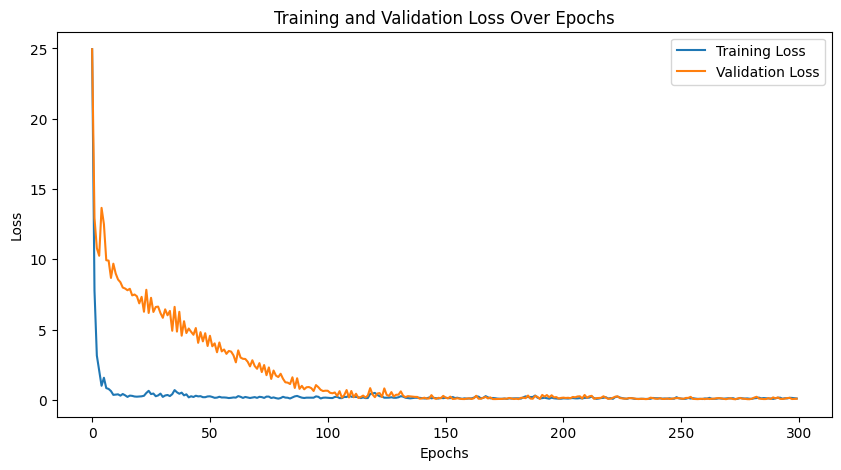

MSE: 0.0777816801759588
RMSE: 0.27889367181052854
R^2 Score: 0.9898108577832968


In [10]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, BatchNormalization, Flatten
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
inputs = Input(shape=input_shape)

# 卷积层
x = Conv1D(filters=15, kernel_size=3, strides=1, padding='valid')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = BatchNormalization()(x) 
# 双向LSTM层
x = Bidirectional(LSTM(36, return_sequences=True))(x)

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=4, key_dim=72)(x, x)  # 注意力机制输入和输出应相同

# 将注意力输出展平
x = Flatten()(attention_output)

# Dropout层
x = Dropout(0.3)(x)

# 全连接层
outputs = Dense(1)(x)

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.00303), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)


# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
# 保存模型
model.save("model/woa_Cnn_BiLSTM_MultAE.model.h5")
print("模型已保存为Cnn_BiLSTM_MultAE.h5")
# 加载保存的最佳模型
model = load_model('model/woa_Cnn_BiLSTM_MultAE.model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


模型已保存为Cnn_BiLSTM_MultAE.h5
2/2 [==============================] - 1s 5ms/step
Test Loss: 0.1386657953262329
Test MSE: 0.1386657953262329
R^2 Score on Test Set: 0.9829171603377228


## ssa_Cnn_BiLSTM_MultAE

In [9]:
# 15 37 5 0.00360

In [14]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, BatchNormalization, Flatten
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
inputs = Input(shape=input_shape)

# 卷积层
x = Conv1D(filters=15, kernel_size=3, strides=1, padding='valid')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = BatchNormalization()(x) 
# 双向LSTM层
x = Bidirectional(LSTM(37, return_sequences=True))(x)

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=5, key_dim=74)(x, x)  # 注意力机制输入和输出应相同

# 将注意力输出展平
x = Flatten()(attention_output)

# Dropout层
x = Dropout(0.3)(x)

# 全连接层
outputs = Dense(1)(x)

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.00360), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)


# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

Epoch 1/300
5/5 [==============================] - 5s 221ms/step - loss: 20.9545 - mse: 20.9545 - val_loss: 26.4479 - val_mse: 26.4479
Epoch 2/300
5/5 [==============================] - 0s 20ms/step - loss: 4.6380 - mse: 4.6380 - val_loss: 10.7815 - val_mse: 10.7815
Epoch 3/300
5/5 [==============================] - 0s 19ms/step - loss: 2.8503 - mse: 2.8503 - val_loss: 9.2913 - val_mse: 9.2913
Epoch 4/300
5/5 [==============================] - 0s 17ms/step - loss: 1.1910 - mse: 1.1910 - val_loss: 13.5440 - val_mse: 13.5440
Epoch 5/300
5/5 [==============================] - 0s 19ms/step - loss: 1.0840 - mse: 1.0840 - val_loss: 12.5092 - val_mse: 12.5092
Epoch 6/300
5/5 [==============================] - 0s 19ms/step - loss: 0.5602 - mse: 0.5602 - val_loss: 11.1862 - val_mse: 11.1862
Epoch 7/300
5/5 [==============================] - 0s 18ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 9.7797 - val_mse: 9.7797
Epoch 8/300
5/5 [==============================] - 0s 17ms/step - loss: 0.522

5/5 [==============================] - 0s 25ms/step - loss: 0.2920 - mse: 0.2920 - val_loss: 0.0985 - val_mse: 0.0985
Epoch 126/300
5/5 [==============================] - 0s 47ms/step - loss: 0.1639 - mse: 0.1639 - val_loss: 0.3206 - val_mse: 0.3206
Epoch 127/300
5/5 [==============================] - 0s 37ms/step - loss: 0.1132 - mse: 0.1132 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 128/300
5/5 [==============================] - 0s 23ms/step - loss: 0.0982 - mse: 0.0982 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 129/300
5/5 [==============================] - 0s 34ms/step - loss: 0.1628 - mse: 0.1628 - val_loss: 0.3654 - val_mse: 0.3654
Epoch 130/300
5/5 [==============================] - 0s 23ms/step - loss: 0.2589 - mse: 0.2589 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 131/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1457 - mse: 0.1457 - val_loss: 0.1433 - val_mse: 0.1433
Epoch 132/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1055 - mse: 0.

5/5 [==============================] - 0s 22ms/step - loss: 0.0739 - mse: 0.0739 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 250/300
5/5 [==============================] - 0s 26ms/step - loss: 0.0864 - mse: 0.0864 - val_loss: 0.1495 - val_mse: 0.1495
Epoch 251/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.1783 - val_mse: 0.1783
Epoch 252/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0842 - mse: 0.0842 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 253/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0765 - mse: 0.0765 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 254/300
5/5 [==============================] - 0s 21ms/step - loss: 0.1112 - mse: 0.1112 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 255/300
5/5 [==============================] - 0s 28ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 256/300
5/5 [==============================] - 0s 26ms/step - loss: 0.0869 - mse: 0.

MSE: 0.11287730374544225
RMSE: 0.33597217704066246
R^2 Score: 0.9852134474557699


In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
# 保存模型
model.save("model/ssa_Cnn_BiLSTM_MultAE.model.h5")
print("模型已保存为Cnn_BiLSTM_MultAE.h5")
# 加载保存的最佳模型
model = load_model('model/ssa_Cnn_BiLSTM_MultAE.model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


模型已保存为Cnn_BiLSTM_MultAE.h5
2/2 [==============================] - 1s 4ms/step
Test Loss: 0.1522371619939804
Test MSE: 0.1522371619939804
R^2 Score on Test Set: 0.9812452406925887


## BiLSTM_MultiHeadAttention

Epoch 1/300
5/5 [==============================] - 3s 147ms/step - loss: 27.8819 - mse: 27.8819 - val_loss: 15.5109 - val_mse: 15.5109
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 17.1719 - mse: 17.1719 - val_loss: 11.4220 - val_mse: 11.4220
Epoch 3/300
5/5 [==============================] - 0s 13ms/step - loss: 12.6590 - mse: 12.6590 - val_loss: 13.8430 - val_mse: 13.8430
Epoch 4/300
5/5 [==============================] - 0s 13ms/step - loss: 11.0188 - mse: 11.0188 - val_loss: 9.4775 - val_mse: 9.4775
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 12.3077 - mse: 12.3077 - val_loss: 9.4285 - val_mse: 9.4285
Epoch 6/300
5/5 [==============================] - 0s 13ms/step - loss: 11.0458 - mse: 11.0458 - val_loss: 10.4002 - val_mse: 10.4002
Epoch 7/300
5/5 [==============================] - 0s 13ms/step - loss: 11.0529 - mse: 11.0529 - val_loss: 12.6242 - val_mse: 12.6242
Epoch 8/300
5/5 [==============================] - 0s 13ms/step -

5/5 [==============================] - 0s 13ms/step - loss: 0.4052 - mse: 0.4052 - val_loss: 0.3273 - val_mse: 0.3273
Epoch 126/300
5/5 [==============================] - 0s 13ms/step - loss: 0.4117 - mse: 0.4117 - val_loss: 0.3176 - val_mse: 0.3176
Epoch 127/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3963 - mse: 0.3963 - val_loss: 0.3356 - val_mse: 0.3356
Epoch 128/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3396 - mse: 0.3396 - val_loss: 0.3177 - val_mse: 0.3177
Epoch 129/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3654 - mse: 0.3654 - val_loss: 0.3138 - val_mse: 0.3138
Epoch 130/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3591 - mse: 0.3591 - val_loss: 0.3796 - val_mse: 0.3796
Epoch 131/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3504 - mse: 0.3504 - val_loss: 0.3137 - val_mse: 0.3137
Epoch 132/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3843 - mse: 0.

5/5 [==============================] - 0s 13ms/step - loss: 0.4875 - mse: 0.4875 - val_loss: 0.1528 - val_mse: 0.1528
Epoch 250/300
5/5 [==============================] - 0s 12ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.1616 - val_mse: 0.1616
Epoch 251/300
5/5 [==============================] - 0s 13ms/step - loss: 0.2117 - mse: 0.2117 - val_loss: 0.1707 - val_mse: 0.1707
Epoch 252/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1983 - mse: 0.1983 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 253/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1370 - mse: 0.1370 - val_loss: 0.1524 - val_mse: 0.1524
Epoch 254/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1811 - mse: 0.1811 - val_loss: 0.1734 - val_mse: 0.1734
Epoch 255/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.1761 - val_mse: 0.1761
Epoch 256/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1837 - mse: 0.

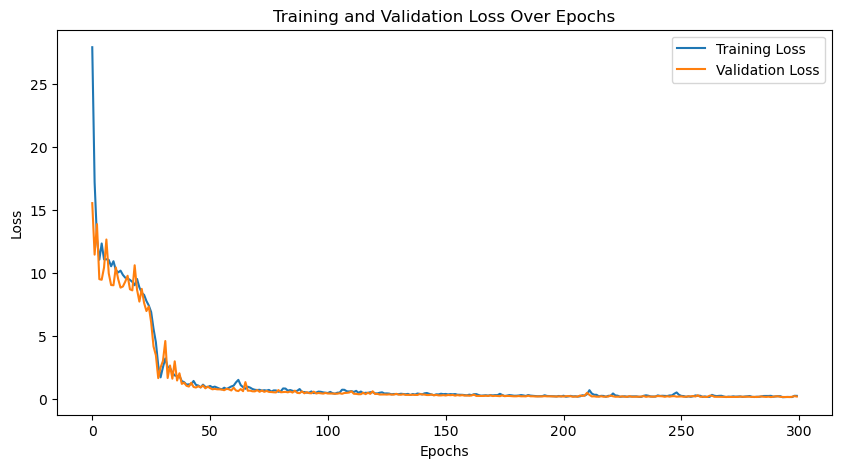

MSE: 0.1604243655324771
RMSE: 0.4005301056505954
R^2 Score: 0.9789849400046772


In [10]:
from keras.models import Model
from keras.layers import Input, Bidirectional, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
inputs = Input(shape=input_shape)

# 双向LSTM层
x = Bidirectional(LSTM(32, return_sequences=True))(inputs)

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(x, x)

# 将注意力输出展平
x = Flatten()(attention_output)

# Dropout层
x = Dropout(0.3)(x)

# 全连接层
outputs = Dense(1)(x)

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)



In [11]:
# 保存模型
model.save("model/BiLSTM_MultiHeadAttention.model.h5")
print("模型已保存为BiLSTM_MultiHeadAttention.h5")
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载保存的最佳模型
model = load_model('model/BiLSTM_MultiHeadAttention.model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


模型已保存为BiLSTM_MultiHeadAttention.h5


D:\anaconda3\envs\tf\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 3ms/step
Test Loss: 0.21124987304210663
Test MSE: 0.21124987304210663
R^2 Score on Test Set: 0.9739751980552862


## CNN_MultiHeadAttention

In [41]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 输入形状
input_shape = (X_train_expanded.shape[1], 1)
inputs = Input(shape=input_shape)

# 卷积层
x = Conv1D(filters=16, kernel_size=3, strides=1, padding='valid')(inputs)
x = MaxPooling1D(pool_size=2)(x)

# 调整卷积和池化后的输出以适应多头注意力机制，确保输出至少有两个维度
sequence_length = x.shape[1]
feature_dim = x.shape[2]
x = Reshape((sequence_length, feature_dim))(x)

# 多头注意力机制层
attention_output = MultiHeadAttention(num_heads=8, key_dim=feature_dim)(x, x)

# 展平处理注意力输出，准备全连接层
x = Flatten()(attention_output)

# Dropout层
x = Dropout(0.3)(x)

# 全连接层
outputs = Dense(1)(x)

# 模型定义和编译
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# 训练模型
history = model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=300, batch_size=32, verbose=1)

# 预测验证集
y_pred = model.predict(X_val_expanded).flatten()

# 计算MSE, RMSE, R2
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# 绘制训练和验证的损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)


Epoch 1/300
5/5 [==============================] - 1s 51ms/step - loss: 29.3248 - mse: 29.3248 - val_loss: 20.0205 - val_mse: 20.0205
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 25.8897 - mse: 25.8897 - val_loss: 17.1876 - val_mse: 17.1876
Epoch 3/300
5/5 [==============================] - 0s 13ms/step - loss: 22.3922 - mse: 22.3922 - val_loss: 14.1256 - val_mse: 14.1256
Epoch 4/300
5/5 [==============================] - 0s 12ms/step - loss: 18.3502 - mse: 18.3502 - val_loss: 11.4144 - val_mse: 11.4144
Epoch 5/300
5/5 [==============================] - 0s 15ms/step - loss: 14.5477 - mse: 14.5477 - val_loss: 10.0714 - val_mse: 10.0714
Epoch 6/300
5/5 [==============================] - 0s 13ms/step - loss: 12.1186 - mse: 12.1186 - val_loss: 11.4768 - val_mse: 11.4768
Epoch 7/300
5/5 [==============================] - 0s 13ms/step - loss: 11.9447 - mse: 11.9447 - val_loss: 12.6012 - val_mse: 12.6012
Epoch 8/300
5/5 [==============================] - 0s 13ms/ste

5/5 [==============================] - 0s 12ms/step - loss: 0.7277 - mse: 0.7277 - val_loss: 0.5256 - val_mse: 0.5256
Epoch 64/300
5/5 [==============================] - 0s 11ms/step - loss: 0.7559 - mse: 0.7559 - val_loss: 0.5445 - val_mse: 0.5445
Epoch 65/300
5/5 [==============================] - 0s 11ms/step - loss: 0.7164 - mse: 0.7164 - val_loss: 0.5129 - val_mse: 0.5129
Epoch 66/300
5/5 [==============================] - 0s 12ms/step - loss: 0.7151 - mse: 0.7151 - val_loss: 0.4931 - val_mse: 0.4931
Epoch 67/300
5/5 [==============================] - 0s 11ms/step - loss: 0.6313 - mse: 0.6313 - val_loss: 0.5017 - val_mse: 0.5017
Epoch 68/300
5/5 [==============================] - 0s 11ms/step - loss: 0.7890 - mse: 0.7890 - val_loss: 0.4859 - val_mse: 0.4859
Epoch 69/300
5/5 [==============================] - 0s 11ms/step - loss: 0.6851 - mse: 0.6851 - val_loss: 0.6193 - val_mse: 0.6193
Epoch 70/300
5/5 [==============================] - 0s 11ms/step - loss: 0.5734 - mse: 0.5734 - 

5/5 [==============================] - 0s 11ms/step - loss: 0.4767 - mse: 0.4767 - val_loss: 0.4010 - val_mse: 0.4010
Epoch 188/300
5/5 [==============================] - 0s 11ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.4001 - val_mse: 0.4001
Epoch 189/300
5/5 [==============================] - 0s 13ms/step - loss: 0.4175 - mse: 0.4175 - val_loss: 0.4109 - val_mse: 0.4109
Epoch 190/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3624 - mse: 0.3624 - val_loss: 0.4059 - val_mse: 0.4059
Epoch 191/300
5/5 [==============================] - 0s 13ms/step - loss: 0.4359 - mse: 0.4359 - val_loss: 0.4079 - val_mse: 0.4079
Epoch 192/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3046 - mse: 0.3046 - val_loss: 0.3862 - val_mse: 0.3862
Epoch 193/300
5/5 [==============================] - 0s 12ms/step - loss: 0.3516 - mse: 0.3516 - val_loss: 0.3864 - val_mse: 0.3864
Epoch 194/300
5/5 [==============================] - 0s 12ms/step - loss: 0.3571 - mse: 0.

MSE: 0.27952068276452524
RMSE: 0.5286971560019263
R^2 Score: 0.9633837173129358


In [42]:
# 保存模型
model.save("model/CNN_MultiHeadAttention.model.h5")
print("模型已保存为CNN_MultiHeadAttention.modelh5")

D:\programs\ana\envs\shijianxvlie\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


模型已保存为CNN_MultiHeadAttention.modelh5


In [44]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载保存的最佳模型
model = load_model('model/CNN_MultiHeadAttention.model.h5')
# 将测试集数据增加一个维度以匹配BiLSTM的输入要求
X_test_expanded = np.expand_dims(X_test, axis=-1)

# 使用evaluate方法计算测试集上的损失和MSE
test_loss, test_mse = model.evaluate(X_test_expanded, y_test, verbose=1)

# 使用模型进行预测
y_test_pred = model.predict(X_test_expanded).flatten()

# 计算R^2分数
r2_test = r2_score(y_test, y_test_pred)

# 输出所有结果
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)
print("R^2 Score on Test Set:", r2_test)


2/2 [==============================] - 0s 3ms/step
Test Loss: 0.20225642621517181
Test MSE: 0.20225642621517181
R^2 Score on Test Set: 0.9750831422008833
